# 0. Introduction

### This document compares the performance of different bias correction methods for precipitation, tmean, and trange.

### Different methods are used for correction:  
(1) QM: Quantile mapping is carried out for each climatological month (1-12).  
(2) Mul_Climo: Multiplicative correction that calculates correction factors for each climatological month (1-12).   
(3) Add_Climo: Additive correction that calculates correction factors for each climatological month (1-12).  
(4) Mul_Daily: Multiplicative correction that calculates correction factors for every day.  
(5) Add_Daily: Additive correction that calculates correction factors for every day.  
Mul_Daily and Add_Daily are choices in programs but are not compared here.  

### Brief conclusions:  
...

# 1. Load modules and files

In [2]:
import numpy as np
import auxiliary as au
from matplotlib import pyplot as plt
import tabulate

def cal_statiscs(file_stn, file_readown, var):
    # load station data
    d1=np.load(file_stn)
    stn_lle=d1['stn_lle']
    stndata=d1[var+'_stn']
    stndata[np.nanmean(stndata,axis=1)==0,:]=np.nan
    nstn,ntimes=np.shape(stndata)
    # load downscaled data
    downdata=np.nan*np.zeros([reanum,nstn,ntimes], dtype=np.float32)
    for i in range(reanum):
        d2=np.load(file_readown[i])
        if i==0:
            downdata[i]=d2[var+'_readown']
        else:
            downdata[i]=d2['reacorr_stn']
    # calculate the metrics for each station
    met_prcp=np.nan * np.zeros([reanum,nstn,4])
    for i in range(nstn):
        if np.isnan(stndata[i,0]):
            continue
        for r in range(reanum):
            met_prcp[r,i,:] = au.metric(stndata[i],downdata[r,i,:])

    mean_prcp = np.zeros([nstn,reanum+1])
    mean_prcp[:,0] = np.nanmean(stndata, axis=1)
    for i in range(reanum):
        mean_prcp[:,i+1]=np.nanmean(downdata[i], axis=1)
    return met_prcp, mean_prcp

file_stn='/Users/localuser/Research/EMDNA/stndata_whole.npz'
file_readown=['/Users/localuser/Research/EMDNA/downscale/MERRA2_downto_stn_nearest.npz',
              '/Users/localuser/Research/EMDNA/correction/MERRA2/corrstn_nearest_prcp_QM.npz',
              '/Users/localuser/Research/EMDNA/correction/MERRA2/corrstn_nearest_prcp_Mul_Climo.npz']
reanum = len(file_readown)
met_prcp, mean_prcp = cal_statiscs(file_stn, file_readown, 'prcp')

file_readown=['/Users/localuser/Research/EMDNA/downscale/MERRA2_downto_stn_nearest.npz',
              '/Users/localuser/Research/EMDNA/correction/MERRA2/corrstn_nearest_tmean_QM.npz',
              '/Users/localuser/Research/EMDNA/correction/MERRA2/corrstn_nearest_tmean_Add_Climo.npz']
met_tmean, mean_tmean = cal_statiscs(file_stn, file_readown, 'tmean')

file_readown=['/Users/localuser/Research/EMDNA/downscale/MERRA2_downto_stn_nearest.npz',
              '/Users/localuser/Research/EMDNA/correction/MERRA2/corrstn_nearest_trange_QM.npz',
              '/Users/localuser/Research/EMDNA/correction/MERRA2/corrstn_nearest_trange_Add_Climo.npz',
              '/Users/localuser/Research/EMDNA/correction/MERRA2/corrstn_nearest_trange_Mul_Climo.npz']
met_trange, mean_trange = cal_statiscs(file_stn, file_readown, 'trange')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


# 2. Spatial distribution of station and downscaled data

## 2.1 Precipitation

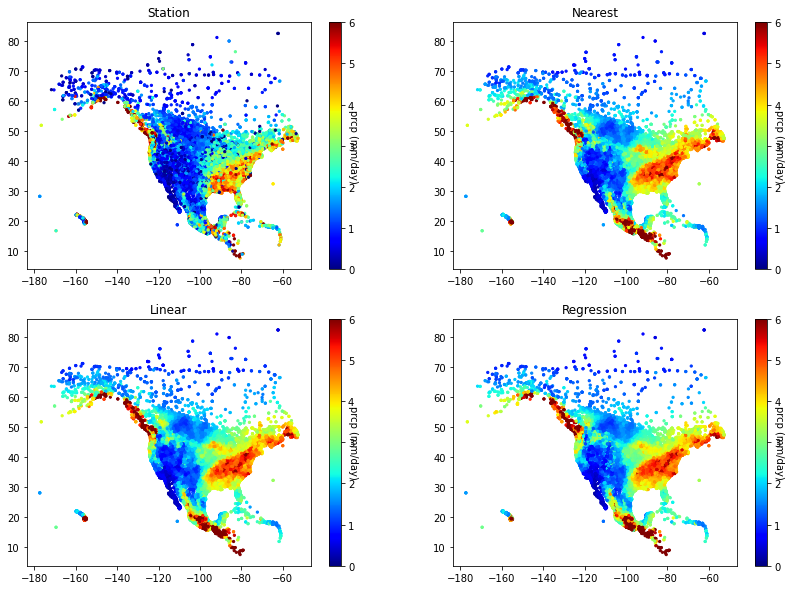

In [216]:
dplot = mean_prcp
titles=['Station','Nearest','Linear','Regression']
plt.figure(figsize=[14,10])
for i in range(reanum-1):
    plt.subplot(2,2,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[:,i],cmap='jet')
    cbar = plt.colorbar()
    cbar.set_label('prcp (mm/day)', rotation=270)
    plt.clim([0,6])
    plt.title(titles[i])

## 2.2 Tmean

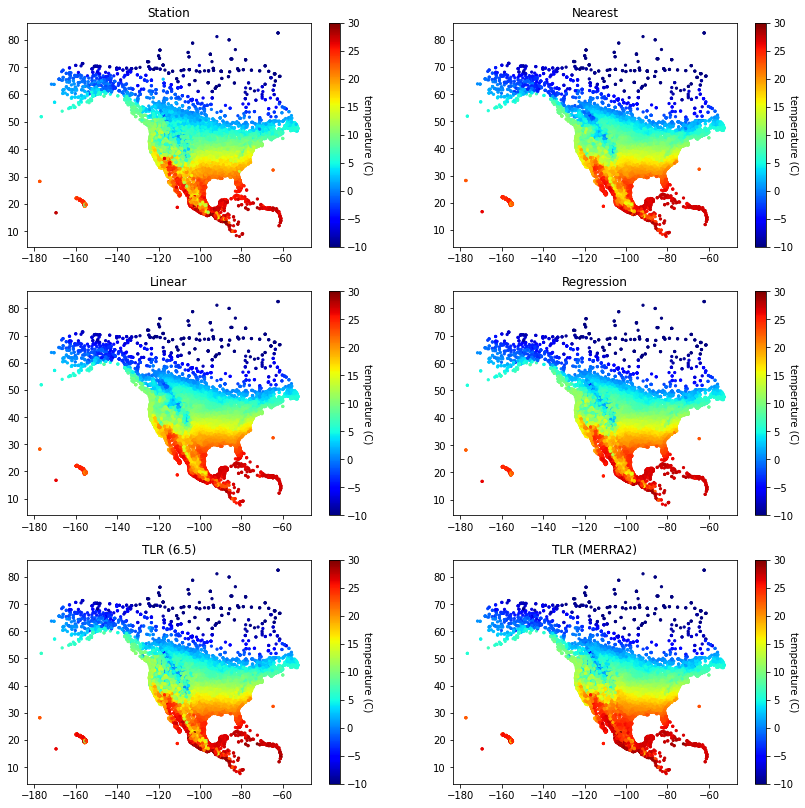

In [229]:
dplot = mean_tmean
titles=['Station','Nearest','Linear','Regression','TLR (6.5)','TLR (MERRA2)']
plt.figure(figsize=[14,14])
for i in range(reanum+1):
    plt.subplot(3,2,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[:,i],cmap='jet')
    cbar = plt.colorbar()
    cbar.set_label('temperature (C)', rotation=270)
    plt.clim([-10,30])
    plt.title(titles[i])

## 2.3 Trange

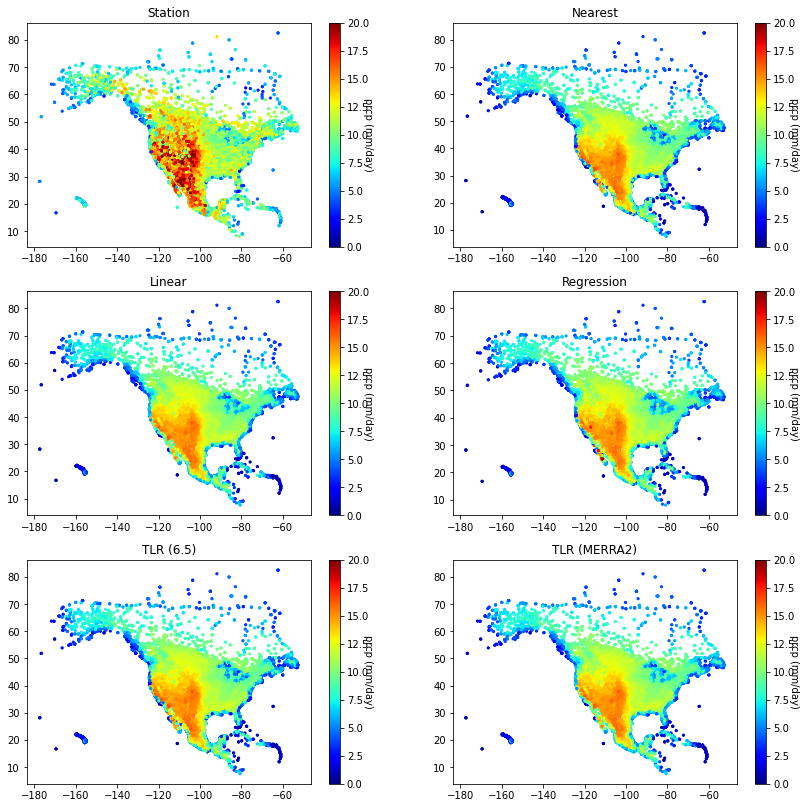

In [234]:
dplot = mean_trange
titles=['Station','Nearest','Linear','Regression','TLR (6.5)','TLR (MERRA2)']
plt.figure(figsize=[14,14])
for i in range(reanum+1):
    plt.subplot(3,2,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[:,i],cmap='jet')
    cbar = plt.colorbar()
    cbar.set_label('prcp (mm/day)', rotation=270)
    plt.clim([0,20])
    plt.title(titles[i])

# 3. Accuracy Evaluation

## Note: for this part, we should look more at distribution because the mean/median values are largely determined by stations in plain regions where the station number is very large

## 3.1 Precipitation

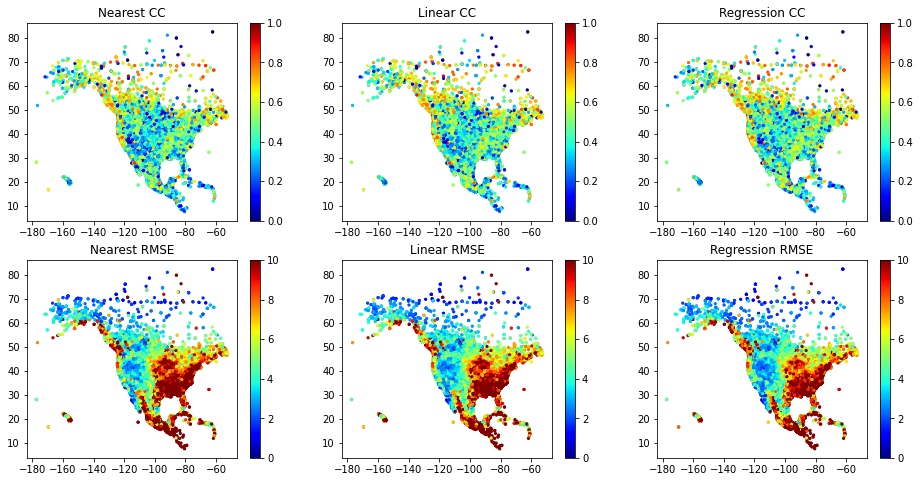

In [218]:
dplot=met_prcp
titles=['Nearest','Linear','Regression']
plt.figure(figsize=[16,8])
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,1])
    plt.title(titles[i]+' CC')
    
    plt.subplot(2,3,i+4)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,10])
    plt.title(titles[i]+' RMSE')

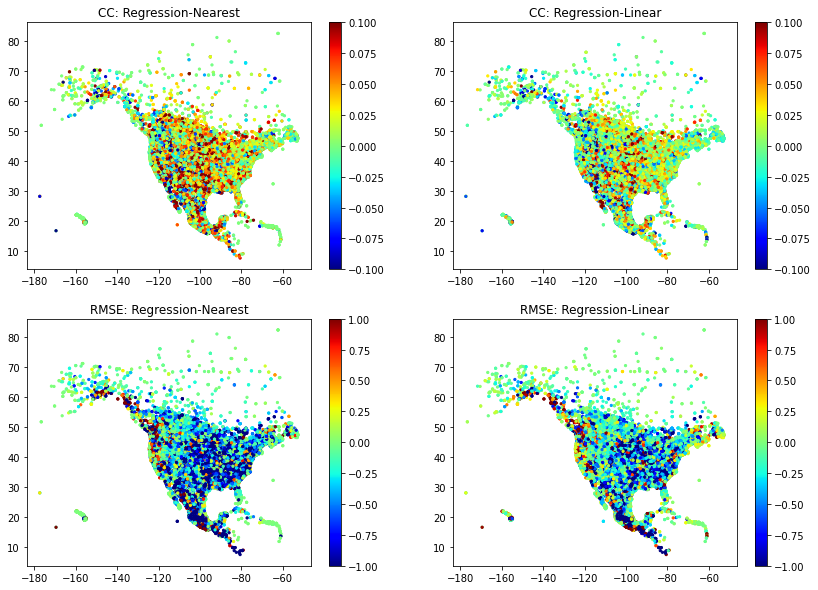

In [220]:
dplot=met_prcp
titles=['Regression-Nearest','Regression-Linear']
plt.figure(figsize=[14,10])
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[2,:,0]-dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.1,0.1])
    plt.title('CC: '+titles[i])
    
    plt.subplot(2,2,i+3)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[2,:,3]-dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-1,1])
    plt.title('RMSE: '+titles[i])

In [219]:
metmean_prcp = np.zeros([reanum-2, 4])
for i in range(reanum-2):
    metmean_prcp[i] = np.nanmean(met_prcp[i,:,:],axis=0)
df = pandas.DataFrame(metmean_prcp,['Nearest','Linear','Regression'],['CC', 'ME', 'MAE', 'RMSE'])
print('Mean metrics')
print(df.round(2))

print('##################################################')
print('##################################################')

metmedian_prcp = np.zeros([reanum-2, 4])
for i in range(reanum-2):
    metmedian_prcp[i] = np.nanmedian(met_prcp[i,:,:],axis=0)
df = pandas.DataFrame(metmedian_prcp,['Nearest','Linear','Regression'],['CC', 'ME', 'MAE', 'RMSE'])
print('Median metrics')
print(df.round(2))

Mean metrics
              CC    ME   MAE  RMSE
Nearest     0.50  0.71  3.20  7.91
Linear      0.51  0.70  3.14  7.59
Regression  0.52  0.67  3.10  7.21
##################################################
##################################################
Median metrics
              CC    ME   MAE  RMSE
Nearest     0.50  0.54  3.08  7.62
Linear      0.51  0.55  3.03  7.35
Regression  0.53  0.53  3.03  7.00


## 3.2 Tmean

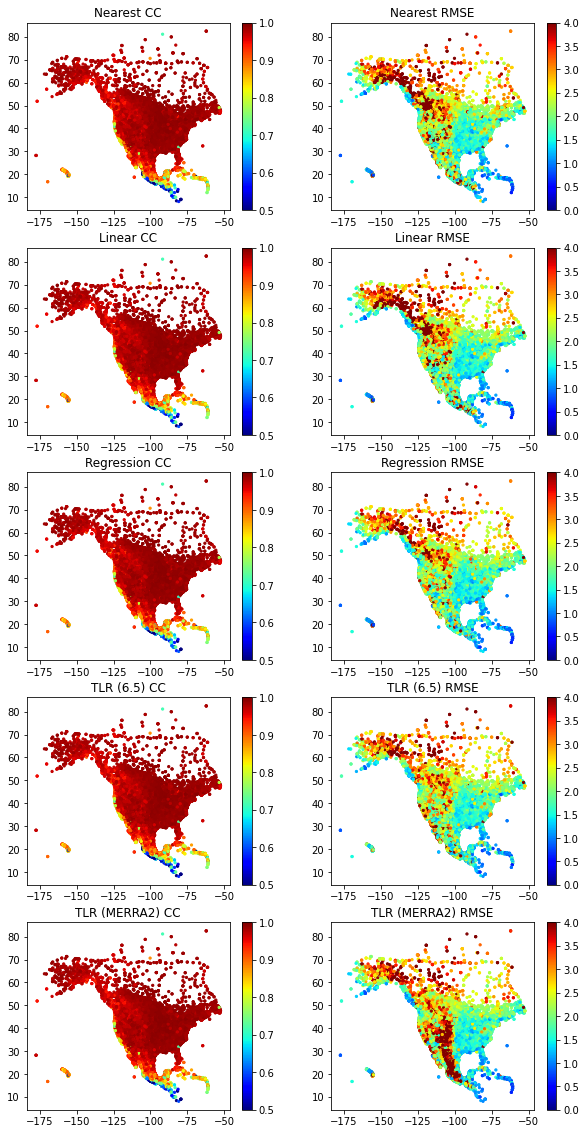

In [231]:
dplot=met_tmean
titles=['Nearest','Linear','Regression','TLR (6.5)','TLR (MERRA2)']
plt.figure(figsize=[10,20])
for i in range(reanum):
    plt.subplot(5,2,(i+1)*2-1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0.5,1])
    plt.title(titles[i]+' CC')
    
    plt.subplot(5,2,(i+1)*2)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,4])
    plt.title(titles[i]+' RMSE')

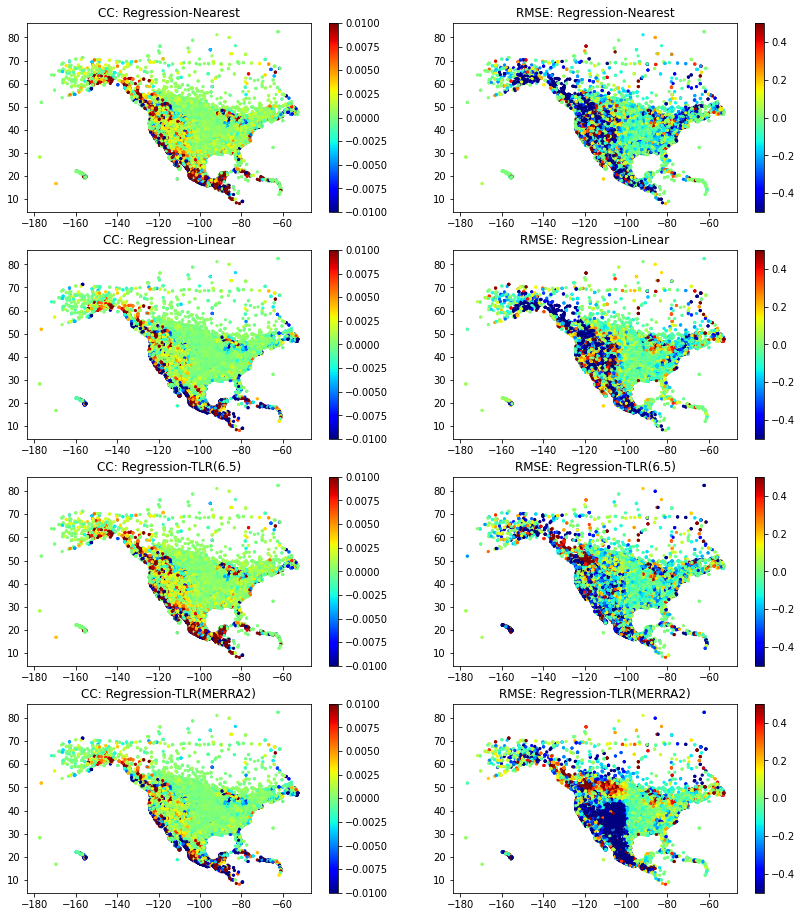

In [232]:
dplot=met_tmean[[0,1,3,4,2],:,:]
titles=['Regression-Nearest','Regression-Linear','Regression-TLR(6.5)','Regression-TLR(MERRA2)']
plt.figure(figsize=[14,16])
for i in range(reanum-1):
    plt.subplot(4,2,(i+1)*2-1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[4,:,0]-dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.01,0.01])
    plt.title('CC: '+titles[i])
    
    plt.subplot(4,2,(i+1)*2)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[4,:,3]-dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.5,0.5])
    plt.title('RMSE: '+titles[i])

In [233]:
metmean_tmean = np.zeros([reanum, 4])
for i in range(reanum):
    metmean_tmean[i] = np.nanmean(met_tmean[i,:,:],axis=0)
df = pandas.DataFrame(metmean_tmean,['Nearest','Linear','Regression','TLR(6.5)','TLR(MERRA2)'],['CC', 'ME', 'MAE', 'RMSE'])
print('Mean metrics')
print(df.round(2))

print('##################################################')
print('##################################################')

metmedian_tmean = np.zeros([reanum, 4])
for i in range(reanum):
    metmedian_tmean[i] = np.nanmedian(met_tmean[i,:,:],axis=0)
df = pandas.DataFrame(metmedian_tmean,['Nearest','Linear','Regression','TLR(6.5)','TLR(MERRA2)'],['CC', 'ME', 'MAE', 'RMSE'])
print('Median metrics')
print(df.round(2))

Mean metrics
               CC    ME   MAE  RMSE
Nearest      0.95  0.18  2.08  2.56
Linear       0.96  0.17  2.02  2.49
Regression   0.96  0.41  1.85  2.32
TLR(6.5)     0.95  0.54  1.93  2.42
TLR(MERRA2)  0.96  1.31  2.45  2.91
##################################################
##################################################
Median metrics
               CC    ME   MAE  RMSE
Nearest      0.97  0.22  1.86  2.35
Linear       0.98  0.19  1.81  2.28
Regression   0.98  0.38  1.72  2.18
TLR(6.5)     0.97  0.49  1.81  2.30
TLR(MERRA2)  0.98  0.77  1.98  2.52


## 3.3 Trange

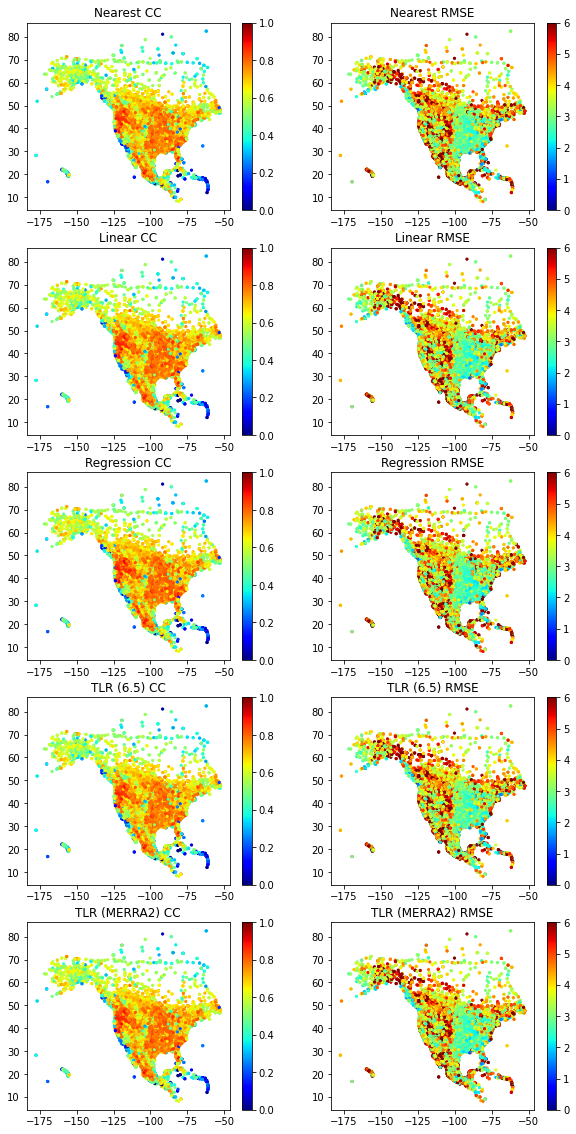

In [235]:
dplot=met_trange
titles=['Nearest','Linear','Regression','TLR (6.5)','TLR (MERRA2)']
plt.figure(figsize=[10,20])
for i in range(reanum):
    plt.subplot(5,2,(i+1)*2-1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,1])
    plt.title(titles[i]+' CC')
    
    plt.subplot(5,2,(i+1)*2)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,6])
    plt.title(titles[i]+' RMSE')

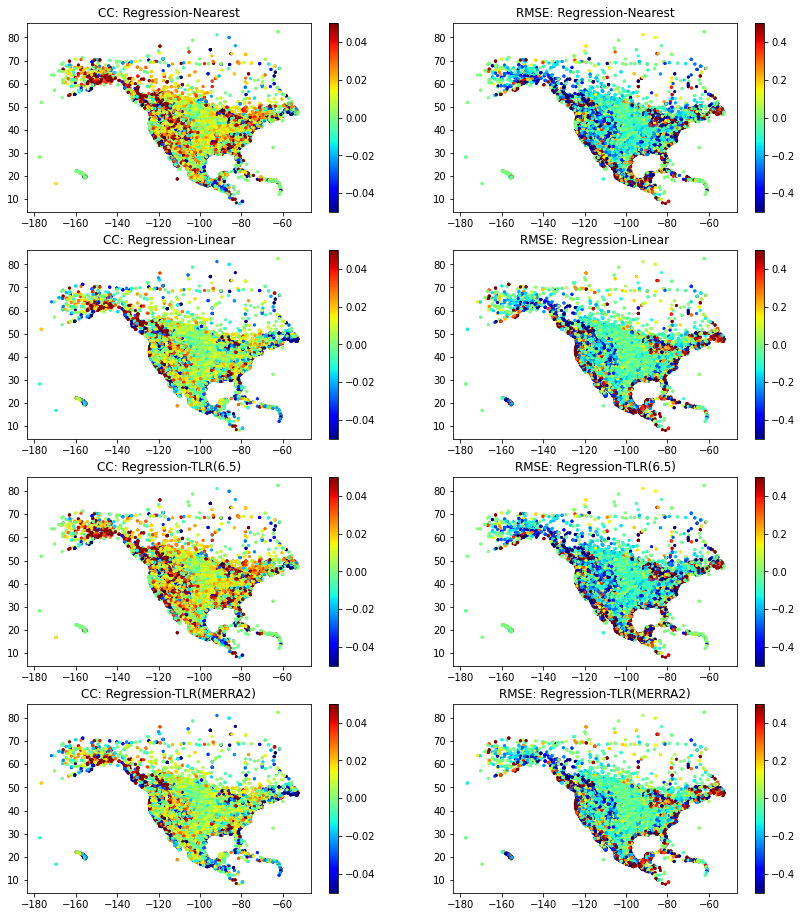

In [236]:
dplot=met_trange[[0,1,3,4,2],:,:]
titles=['Regression-Nearest','Regression-Linear','Regression-TLR(6.5)','Regression-TLR(MERRA2)']
plt.figure(figsize=[14,16])
for i in range(reanum-1):
    plt.subplot(4,2,(i+1)*2-1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[4,:,0]-dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.05,0.05])
    plt.title('CC: '+titles[i])
    
    plt.subplot(4,2,(i+1)*2)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[4,:,3]-dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.5,0.5])
    plt.title('RMSE: '+titles[i])

In [237]:
metmean_trange = np.zeros([reanum, 4])
for i in range(reanum):
    metmean_trange[i] = np.nanmean(met_trange[i,:,:],axis=0)
df = pandas.DataFrame(metmean_trange,['Nearest','Linear','Regression','TLR(6.5)','TLR(MERRA2)'],['CC', 'ME', 'MAE', 'RMSE'])
print('Mean metrics')
print(df.round(2))

print('##################################################')
print('##################################################')

metmedian_trange = np.zeros([reanum, 4])
for i in range(reanum):
    metmedian_trange[i] = np.nanmedian(met_trange[i,:,:],axis=0)
df = pandas.DataFrame(metmedian_trange,['Nearest','Linear','Regression','TLR(6.5)','TLR(MERRA2)'],['CC', 'ME', 'MAE', 'RMSE'])
print('Median metrics')
print(df.round(2))

Mean metrics
               CC    ME   MAE  RMSE
Nearest      0.63 -1.39  3.33  4.11
Linear       0.64 -1.41  3.26  4.02
Regression   0.65 -1.47  3.27  4.03
TLR(6.5)     0.63 -1.39  3.32  4.11
TLR(MERRA2)  0.64 -1.41  3.26  4.02
##################################################
##################################################
Median metrics
               CC    ME   MAE  RMSE
Nearest      0.67 -1.23  3.10  3.92
Linear       0.68 -1.28  3.06  3.86
Regression   0.69 -1.29  3.05  3.85
TLR(6.5)     0.67 -1.23  3.10  3.92
TLR(MERRA2)  0.68 -1.28  3.06  3.86


# * just for testing

In [198]:
ds=np.load(file_stn)
tr=ds['trange_stn']
ds2=np.load(file_readown[1])
tr2=ds2['trange_readown']
ds3=np.load(file_readown[2])
tr3=ds3['trange_readown']

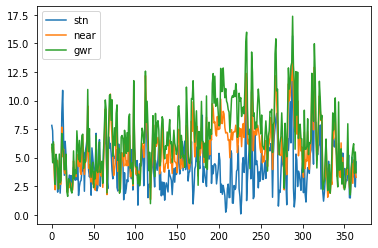

In [199]:
plt.plot(tr[26749,-365:])
plt.plot(tr2[26749,-365:])
plt.plot(tr3[26749,-365:])
plt.legend(['stn','near','gwr'])